<a href="https://colab.research.google.com/github/Camilojaravila/202310_MINE-4206_ANALISIS_CON_MACHINE_LEARNING/blob/main/Laboratorio%204/Taller%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

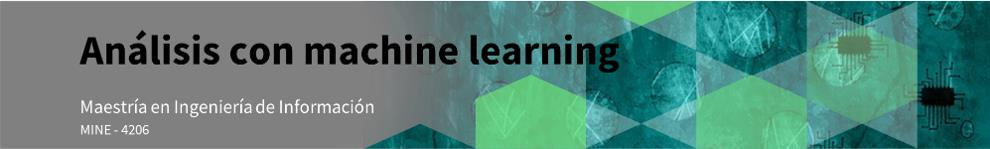

* **Integrante 1:** Fabián Camilo Castellanos Pinto


# Importación de Librerías.

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6160c6d2e43ded5f02983560a3a78d47221651c9fe148cb9a08a835287719fa2
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    

In [3]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 6.8 MB/s eta 0:00:00


In [4]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
import sys
import os
import os.path as osp

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Input
from keras import backend as K
from keras import applications, models

from numpy.random import seed
seed(19)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

from ydata_profiling import ProfileReport

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.12.0


# Diccionario de datos

La sequía es un problema creciente en muchas regiones de Estados Unidos, afectando tanto a la agricultura como a la disponibilidad de agua potable. El conjunto de datos "US Drought Meteorological Data" contiene información meteorológica histórica y actual, que incluye variables como temperatura, precipitación, humedad y presión atmosférica, entre otras.

El objetivo de este proyecto es desarrollar un modelo de detección de anomalías que identifique eventos climáticos extremos o inusuales en diferentes regiones de Estados Unidos, utilizando los datos meteorológicos disponibles. Este modelo deberá ser capaz de detectar patrones anómalos que puedan estar relacionados con la aparición o intensificación de sequías, permitiendo a los responsables de la toma de decisiones anticiparse y tomar medidas para mitigar sus efectos.


**Fuente de datos:** [Predict Droughts using Weather & Soil Data](https://www.kaggle.com/datasets/cdminix/us-drought-meteorological-data)

Se dan a disposición 19'300.680 instancias los cuales conforme los datos en el dataser, están compuestos de la siguiente forma:

| ATRIBUTO | DESCRIPCIÓN |
| :- | :- |
| **fips** | Código de condado (USA) |
| **date** | Fecha de la observación |
| **PRECTOT** | Precipatación (mm día-1) |
| **PS** | Presión en superficie (kPa) |
| **QV2M** | Humedad específica a 2 metros (g/kg) |
| **T2M** | Temperatura a 2 metros (C) |
| **T2MDEW** | Punto de Rocío/Escarcha a 2 metros |
| **T2MWET** | Temperatura de bulbo húmedo a 2 metros (°C) |
| **T2M_MAX** | Temperatura máxima a 2 metros |
| **T2M_MIN** | Temperatura mínima a 2 metros |
| **T2M_RANGE** | Rango de temperatura a 2 metros |
| **TS** | Temperatura de superficie terrestre (C) |
| **WS10M** | Velocidad del viento a 10 metros (m/s) |
| **WS10M_MAX** | Velocidad máxima del viento a 10 metros (m/s) |
| **WS10M_MIN** | Velocidad mínima del viento a 10 metros (m/s) |
| **WS10M_RANGE** | Rango de velocidad del viento a 10 metros (m/s) |
| **WS50M** | Velocidad del viento a 50 metros (m/s) |
| **WS50M_MAX** | Velocidad máxima del viento a 50 metros (m/s) |
| **WS50M_MIN** | Velocidad mínima del viento a 50 metros (m/s) |
| **score** | Medición de la sequía desde cero (sin sequía) a 5 (D4) |


Para la comprensión de las categorías de sequía, relacionan los expertos la siguiente tabla:

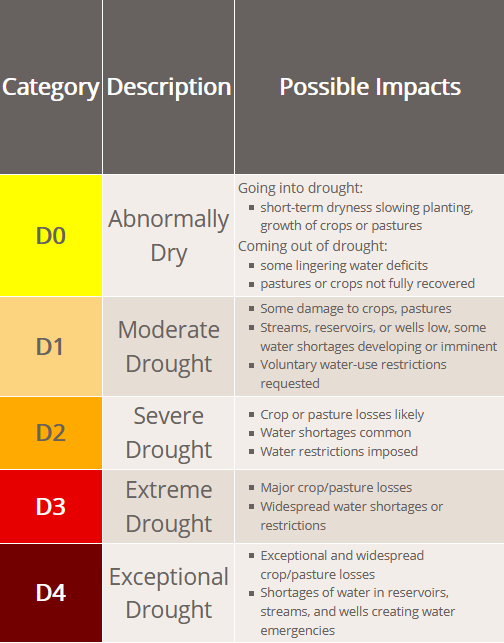

# Perfilamiento y entendimiento de los datos

In [6]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download cdminix/us-drought-meteorological-data

100% 897M/901M [00:03<00:00, 262MB/s]
100% 901M/901M [00:03<00:00, 251MB/s]


In [7]:
dir_path = "/content/us-drought-meteorological-data"

In [8]:
! unzip us-drought-meteorological-data.zip -d "/content/us-drought-meteorological-data"

Archive:  us-drought-meteorological-data.zip
  inflating: /content/us-drought-meteorological-data/soil_data.csv  
  inflating: /content/us-drought-meteorological-data/test_timeseries/test_timeseries.csv  
  inflating: /content/us-drought-meteorological-data/train_timeseries/train_timeseries.csv  
  inflating: /content/us-drought-meteorological-data/validation_timeseries/validation_timeseries.csv  


Verificar el estado de GPU:

In [9]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [10]:
url = f'{dir_path}/train_timeseries/train_timeseries.csv'
data = pd.read_csv(url)

In [11]:
data.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [12]:
print(f"La información cuenta con {data.shape[0]:,} registro(s)")

La información cuenta con 19,300,680 registro(s)


In [13]:
data.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score          float64
dtype: object

Transformando los datos de la fecha previo al profile

In [14]:
data["date"] = pd.to_datetime(data["date"])
data.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [15]:
ProfileReport(data, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Preprocesamiento de los datos

In [16]:
#drop_fields = ["fips", "date"]
drop_fields = ["fips"]

## Entrenamiento

In [17]:
train = data.drop(drop_fields, axis=1)
train.head()

,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.50,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,10.18,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,7.41,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,13.48,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [18]:
print(f"La información cuenta con {train.shape[0]:,} registro(s)")

La información cuenta con 19,300,680 registro(s)


In [19]:
train.dtypes

date           datetime64[ns]
PRECTOT               float64
PS                    float64
QV2M                  float64
T2M                   float64
T2MDEW                float64
T2MWET                float64
T2M_MAX               float64
T2M_MIN               float64
T2M_RANGE             float64
TS                    float64
WS10M                 float64
WS10M_MAX             float64
WS10M_MIN             float64
WS10M_RANGE           float64
WS50M                 float64
WS50M_MAX             float64
WS50M_MIN             float64
WS50M_RANGE           float64
score                 float64
dtype: object

Verificando el balance de clases y evaluando el puntaje (score):

In [20]:
train_nan = train[train["score"].isnull() == True]
print(f"El total de ausencias es { train_nan.shape[0]:,} registro(s)")

El total de ausencias es 16,543,884 registro(s)


In [21]:
train_pos = train[train["score"] == 0]
print(f"El total para la clase positiva es { train_pos.shape[0]:,} registro(s)")

El total para la clase positiva es 1,480,827 registro(s)


In [22]:
train_neg = train[train["score"] > 0]
print(f"El total para la clase negativa es { train_neg.shape[0]:,} registro(s)")

El total para la clase negativa es 1,275,969 registro(s)


El entrenamiento debe aprender de la clase normal:

In [23]:
#train = data[data["score"] == 0]
train = train_pos.copy()
train.head()

,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
430,2001-03-06,0.01,100.57,3.52,4.85,-1.10,-1.05,11.05,-0.12,11.16,4.94,3.16,4.54,2.18,2.36,5.99,7.24,4.59,2.64,0.0
437,2001-03-13,1.30,99.84,8.16,14.63,10.54,10.55,19.03,9.47,9.56,14.53,2.78,3.81,1.98,1.83,5.82,7.04,5.12,1.92,0.0
444,2001-03-20,30.95,99.53,4.35,2.51,1.77,1.77,4.21,0.97,3.24,2.57,2.92,3.49,2.22,1.27,5.16,6.10,4.15,1.94,0.0
451,2001-03-27,0.01,100.92,3.66,6.05,-0.54,-0.49,13.49,-0.96,14.45,6.16,1.95,2.86,1.36,1.50,3.95,6.02,2.26,3.76,0.0
458,2001-04-03,55.62,100.14,12.30,18.04,16.89,16.89,23.23,12.01,11.23,18.03,2.96,4.85,1.62,3.23,5.72,8.10,3.74,4.37,0.0


In [24]:
print(f"La información cuenta con ahora con {train.shape[0]:,} registro(s)")

La información cuenta con ahora con 1,480,827 registro(s)


In [25]:
ProfileReport(train, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Ahora tengo la certeza que no hay ausencias para proceder con el análisis, dato a tener en cuenta para los datos de prueba y validación.

In [26]:
x_train, y_train = train.drop(["score"], axis=1), train['score']
y_train

430         0.0
437         0.0
444         0.0
451         0.0
458         0.0
           ... 
19300647    0.0
19300654    0.0
19300661    0.0
19300668    0.0
19300675    0.0
Name: score, Length: 1480827, dtype: float64

In [27]:
ct = make_column_transformer(
       (StandardScaler(),
        #make_column_selector(dtype_exclude=object)), 
        make_column_selector(dtype_exclude=np.datetime64)), 
       (OrdinalEncoder(),
        make_column_selector(dtype_include=np.datetime64)))

x_train = ct.fit_transform(x_train)
#x_train_ = x_train_.toarray()
print(f"Total= {len(x_train)}")
x_train

Total= 1480827


array([[-4.55452525e-01,  6.88971895e-01, -9.53226744e-01, ...,
         6.66133396e-01, -9.18694893e-01,  6.10000000e+01],
       [-2.65611576e-01,  5.18772487e-01,  7.51946008e-03, ...,
         9.17267175e-01, -1.25481140e+00,  6.20000000e+01],
       [ 4.09778698e+00,  4.46496026e-01, -7.81369126e-01, ...,
         4.57644976e-01, -1.24547483e+00,  6.30000000e+01],
       ...,
       [-4.53980890e-01, -3.44011237e+00, -1.39218837e+00, ...,
        -4.99506408e-01,  7.52551086e-01,  8.84000000e+02],
       [-4.09831832e-01, -3.37949340e+00, -1.11680207e+00, ...,
         1.65171502e+00, -5.31227250e-01,  8.85000000e+02],
       [-4.33377996e-01, -3.43544937e+00, -1.34456518e+00, ...,
         1.29633703e+00, -6.43987643e-02,  8.86000000e+02]])

## Prueba

In [28]:
url = f'{dir_path}/test_timeseries/test_timeseries.csv'
test = pd.read_csv(url)

In [29]:
test["date"] = pd.to_datetime(test["date"])
test.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,...,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0
1,1001,2019-01-02,4.94,100.48,8.65,13.05,11.83,11.74,17.76,9.54,...,13.06,1.02,1.35,0.32,1.03,2.13,3.37,0.56,2.81,NaN
2,1001,2019-01-03,20.74,100.03,8.59,12.12,11.67,11.67,13.74,10.44,...,12.12,1.83,4.23,0.34,3.88,3.41,7.49,0.72,6.77,NaN
3,1001,2019-01-04,16.17,99.47,7.93,11.80,10.38,9.59,18.19,5.44,...,11.72,3.75,5.25,2.34,2.91,6.78,9.61,4.90,4.71,NaN
4,1001,2019-01-05,0.01,100.39,5.32,7.91,4.73,4.71,14.37,3.68,...,7.75,2.32,2.90,1.69,1.21,4.42,5.87,3.15,2.72,NaN


In [30]:
test = test.drop(drop_fields, axis=1)
test.head()

,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,6.46,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0
1,2019-01-02,4.94,100.48,8.65,13.05,11.83,11.74,17.76,9.54,8.23,13.06,1.02,1.35,0.32,1.03,2.13,3.37,0.56,2.81,NaN
2,2019-01-03,20.74,100.03,8.59,12.12,11.67,11.67,13.74,10.44,3.30,12.12,1.83,4.23,0.34,3.88,3.41,7.49,0.72,6.77,NaN
3,2019-01-04,16.17,99.47,7.93,11.80,10.38,9.59,18.19,5.44,12.75,11.72,3.75,5.25,2.34,2.91,6.78,9.61,4.90,4.71,NaN
4,2019-01-05,0.01,100.39,5.32,7.91,4.73,4.71,14.37,3.68,10.69,7.75,2.32,2.90,1.69,1.21,4.42,5.87,3.15,2.72,NaN


In [31]:
print(f"La información cuenta con {test.shape[0]:,} registro(s)")

La información cuenta con 2,271,948 registro(s)


In [32]:
test.dtypes

date           datetime64[ns]
PRECTOT               float64
PS                    float64
QV2M                  float64
T2M                   float64
T2MDEW                float64
T2MWET                float64
T2M_MAX               float64
T2M_MIN               float64
T2M_RANGE             float64
TS                    float64
WS10M                 float64
WS10M_MAX             float64
WS10M_MIN             float64
WS10M_RANGE           float64
WS50M                 float64
WS50M_MAX             float64
WS50M_MIN             float64
WS50M_RANGE           float64
score                 float64
dtype: object

In [33]:
test_nan = test[test["score"].isnull() == True]
print(f"El total de ausencias es { test_nan.shape[0]:,} registro(s)")

El total de ausencias es 1,945,608 registro(s)


In [34]:
test_pos = test[test["score"] == 0]
print(f"El total para la clase positiva es { test_pos.shape[0]:,} registro(s)")

El total para la clase positiva es 222,634 registro(s)


In [35]:
test_neg = test[test["score"] > 0]
print(f"El total para la clase negativa es { test_neg.shape[0]:,} registro(s)")

El total para la clase negativa es 103,706 registro(s)


In [36]:
test = test[test["score"].isnull() == False]
test.head()

,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,6.46,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0
7,2019-01-08,0.05,100.57,8.75,13.15,12.01,11.98,20.04,9.36,10.68,13.05,2.33,3.40,1.68,1.72,5.13,6.51,3.67,2.85,0.0
14,2019-01-15,0.00,101.07,4.04,3.91,0.94,0.96,9.40,1.02,8.38,3.91,1.73,2.40,1.36,1.04,3.28,4.13,2.39,1.75,0.0
21,2019-01-22,0.03,101.14,4.96,6.03,3.81,3.08,12.43,-1.63,14.06,6.08,3.68,4.57,2.49,2.07,6.65,8.56,5.01,3.55,0.0
28,2019-01-29,5.79,100.36,3.69,2.23,-0.41,-1.03,7.33,-5.19,12.52,2.18,3.10,4.52,1.71,2.81,5.62,6.96,3.60,3.35,0.0


In [37]:
print(f"La información cuenta con ahora con {test.shape[0]:,} registro(s)")

La información cuenta con ahora con 326,340 registro(s)


In [38]:
x_test, y_test = test.drop(["score"], axis=1), test['score']
y_test

0          0.0000
7          0.0000
14         0.0000
21         0.0000
28         0.0000
            ...  
2271917    3.5109
2271924    3.5109
2271931    3.5182
2271938    3.5182
2271945    3.5182
Name: score, Length: 326340, dtype: float64

In [39]:
y_test_ = (y_test == 0).astype(int)
y_test_

0          1
7          1
14         1
21         1
28         1
          ..
2271917    0
2271924    0
2271931    0
2271938    0
2271945    0
Name: score, Length: 326340, dtype: int64

## Validación

In [40]:
url = f'{dir_path}/validation_timeseries/validation_timeseries.csv'
validation = pd.read_csv(url)

In [41]:
validation["date"] = pd.to_datetime(validation["date"])
validation.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2017-01-01,32.50,100.02,10.47,14.69,14.47,14.47,17.68,10.53,...,14.63,2.14,2.71,1.52,1.19,4.40,5.96,2.25,3.71,NaN
1,1001,2017-01-02,63.52,100.04,12.75,17.96,17.75,17.75,20.30,16.14,...,17.85,2.75,4.31,1.60,2.71,5.50,8.16,4.05,4.11,NaN
2,1001,2017-01-03,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,...,14.06,2.25,3.73,1.64,2.09,4.80,7.27,2.54,4.72,2.0
3,1001,2017-01-04,0.01,100.02,5.21,8.10,3.86,3.88,11.74,2.12,...,8.08,2.63,3.95,1.34,2.60,4.98,6.16,3.36,2.80,NaN
4,1001,2017-01-05,0.01,99.89,4.54,5.91,2.20,2.22,13.07,-0.18,...,5.85,1.76,2.76,0.47,2.28,3.43,4.70,0.66,4.04,NaN


In [42]:
validation = validation.drop(drop_fields, axis=1)
validation.head()

,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,2017-01-01,32.50,100.02,10.47,14.69,14.47,14.47,17.68,10.53,7.15,14.63,2.14,2.71,1.52,1.19,4.40,5.96,2.25,3.71,NaN
1,2017-01-02,63.52,100.04,12.75,17.96,17.75,17.75,20.30,16.14,4.16,17.85,2.75,4.31,1.60,2.71,5.50,8.16,4.05,4.11,NaN
2,2017-01-03,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,9.20,14.06,2.25,3.73,1.64,2.09,4.80,7.27,2.54,4.72,2.0
3,2017-01-04,0.01,100.02,5.21,8.10,3.86,3.88,11.74,2.12,9.62,8.08,2.63,3.95,1.34,2.60,4.98,6.16,3.36,2.80,NaN
4,2017-01-05,0.01,99.89,4.54,5.91,2.20,2.22,13.07,-0.18,13.24,5.85,1.76,2.76,0.47,2.28,3.43,4.70,0.66,4.04,NaN


In [43]:
print(f"La información cuenta con {validation.shape[0]:,} registro(s)")

La información cuenta con 2,268,840 registro(s)


In [44]:
validation_nan = validation[validation["score"].isnull() == True]
print(f"El total de ausencias es { validation_nan.shape[0]:,} registro(s)")

El total de ausencias es 1,945,608 registro(s)


In [45]:
validation_pos = validation[validation["score"] == 0]
print(f"El total para la clase positiva es { validation_pos.shape[0]:,} registro(s)")

El total para la clase positiva es 191,773 registro(s)


In [46]:
validation_neg = validation[validation["score"] > 0]
print(f"El total para la clase negativa es { validation_neg.shape[0]:,} registro(s)")

El total para la clase negativa es 131,459 registro(s)


In [47]:
validation = validation[validation["score"].isnull() == False]
validation.head()

,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
2,2017-01-03,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,9.20,14.06,2.25,3.73,1.64,2.09,4.80,7.27,2.54,4.72,2.0
9,2017-01-10,0.02,101.13,5.62,5.92,4.54,4.55,12.42,-2.37,14.79,5.81,3.22,4.24,2.52,1.72,6.19,7.55,4.68,2.86,2.0
16,2017-01-17,0.14,100.60,11.41,17.21,16.06,16.06,23.03,13.15,9.88,17.10,2.24,3.61,1.71,1.90,4.93,5.90,2.76,3.15,2.0
23,2017-01-24,0.00,99.72,5.60,9.27,5.34,5.35,16.23,4.18,12.06,8.95,1.82,2.34,1.03,1.31,3.52,6.49,1.47,5.02,1.0
30,2017-01-31,0.00,100.37,7.31,11.38,9.21,9.21,20.29,5.05,15.24,11.32,2.31,3.00,1.76,1.24,5.00,7.40,2.88,4.52,1.0


In [48]:
validation = validation[validation["score"] >= 0]
validation.head()

,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
2,2017-01-03,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,9.20,14.06,2.25,3.73,1.64,2.09,4.80,7.27,2.54,4.72,2.0
9,2017-01-10,0.02,101.13,5.62,5.92,4.54,4.55,12.42,-2.37,14.79,5.81,3.22,4.24,2.52,1.72,6.19,7.55,4.68,2.86,2.0
16,2017-01-17,0.14,100.60,11.41,17.21,16.06,16.06,23.03,13.15,9.88,17.10,2.24,3.61,1.71,1.90,4.93,5.90,2.76,3.15,2.0
23,2017-01-24,0.00,99.72,5.60,9.27,5.34,5.35,16.23,4.18,12.06,8.95,1.82,2.34,1.03,1.31,3.52,6.49,1.47,5.02,1.0
30,2017-01-31,0.00,100.37,7.31,11.38,9.21,9.21,20.29,5.05,15.24,11.32,2.31,3.00,1.76,1.24,5.00,7.40,2.88,4.52,1.0


In [49]:
print(f"La información cuenta con ahora con {validation.shape[0]:,} registro(s)")

La información cuenta con ahora con 323,232 registro(s)


In [50]:
x_val, y_val = validation.drop(["score"], axis=1), validation['score']
y_val

2          2.0000
9          2.0000
16         2.0000
23         1.0000
30         1.0000
            ...  
2268805    0.2572
2268812    0.2572
2268819    0.2572
2268826    0.2572
2268833    0.2572
Name: score, Length: 323232, dtype: float64

# Modelamiento

## Ensamblar el autoencoder

Los autoencoders, como se entrenan sin supervisión verifico las condiciones comunes: 

1. La cantidad de neuronas ocultas es menor que la cantidad de celdas de entrada: **Si**
2. La cantidad de celdas de salida es igual a la cantidad de celdas de entrada: **Si**
3. El autoencoder se entrena de manera en que la salida está lo más cerca posible de la entrada, obligando a los autoencoders a generalizar datos y realizar búsqueda de patrones comunes: **Si**

In [51]:
autoencoder = Sequential(name="Autoencoder")

#Capa de Entrada
autoencoder.add(Input(shape=(x_train.shape[1],)))

#Encoder
autoencoder.add(Dense(1000))
autoencoder.add(Dense(500))

#Decoder
autoencoder.add(Dense(1000))
autoencoder.add(Dense(x_train.shape[1]))

El resúmen del autoencoder y la compilación del mismo:

In [52]:
autoencoder.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              20000     
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 1000)              501000    
                                                                 
 dense_3 (Dense)             (None, 19)                19019     
                                                                 
Total params: 1,040,519
Trainable params: 1,040,519
Non-trainable params: 0
_________________________________________________________________


Definición del Early Stopping para el entrenamiento

In [53]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

## Entrenamiento

Tensor con el autoencoder, 50 épocas, datos transformador y la función Early Stopping.

In [54]:
with tf.device('/device:GPU:0'):
    autoencoder.fit(x_train,
                x_train,
                epochs=50,
                callbacks=[callback]
                )

Epoch 1/50
46276/46276 [==============================] - 123s 3ms/step - loss: 20.7837
Epoch 2/50
46276/46276 [==============================] - 118s 3ms/step - loss: 22.6427
Epoch 3/50
46276/46276 [==============================] - 117s 3ms/step - loss: 14.8647
Epoch 4/50
46276/46276 [==============================] - 117s 3ms/step - loss: 18.8594
Epoch 5/50
46276/46276 [==============================] - 117s 3ms/step - loss: 19.0808
Epoch 6/50
46276/46276 [==============================] - 117s 3ms/step - loss: 41.5105
Epoch 7/50
46276/46276 [==============================] - 117s 3ms/step - loss: 23.4112
Epoch 8/50
46276/46276 [==============================] - 117s 3ms/step - loss: 19.7738


Predicción de datos entrenados:

In [55]:
x_train_pred = autoencoder.predict(x_train)
pd.DataFrame(x_train_pred)

46276/46276 [==============================] - 55s 1ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.511215,0.680523,-0.918834,-0.647503,-0.776352,-0.866370,-0.601862,-0.708635,0.191740,-0.630801,-0.104487,-0.245548,0.164397,-0.388977,0.232880,-0.223125,0.698668,-0.979190,61.057884
1,-0.315139,0.506620,0.036679,0.198415,0.356771,0.288038,0.126403,0.221264,-0.237299,0.236064,-0.323901,-0.547347,0.022036,-0.688205,0.137706,-0.310087,0.912957,-1.321656,62.099480
2,4.028117,0.434601,-0.741707,-0.882177,-0.515650,-0.578985,-1.190668,-0.591407,-1.870250,-0.850483,-0.270190,-0.637583,0.189450,-0.976438,-0.133988,-0.623009,0.484431,-1.305700,63.091354
3,-0.495115,0.749213,-0.898877,-0.558235,-0.753633,-0.821351,-0.377586,-0.785630,1.056371,-0.525626,-0.808931,-0.879496,-0.459971,-0.846578,-0.655148,-0.649039,-0.402476,-0.442624,64.034714
4,7.663680,0.578870,0.892546,0.569571,1.016600,0.891337,0.486331,0.443192,0.221164,0.607369,-0.251911,-0.133566,-0.264260,0.064889,0.116907,0.075770,0.299995,-0.195870,65.136131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480822,-0.384598,-3.519302,-1.268329,-1.669976,-1.695722,-1.663545,-1.680276,-1.353963,-1.255644,-1.556694,1.797370,1.965065,0.875962,2.086903,1.676791,1.673331,1.149199,1.137254,882.015869
1480823,-0.352132,-3.486395,-1.567552,-2.332711,-2.574579,-2.590473,-2.177136,-2.154790,-0.534481,-2.199965,-0.710402,-0.442510,-0.732079,-0.043066,-1.029918,-0.973183,-1.033290,-0.105876,883.009521
1480824,-0.403458,-3.426786,-1.425387,-2.026119,-2.132987,-2.188839,-1.850612,-1.941901,-0.053086,-2.081307,0.065592,0.558288,-0.477617,1.164483,-0.070228,0.202649,-0.455796,0.760119,883.990356
1480825,-0.368179,-3.359453,-1.140300,-1.483724,-1.461982,-1.438276,-1.333109,-1.381850,-0.040065,-1.485941,1.386142,1.241920,1.133307,0.943019,1.479499,0.834385,1.622644,-0.519334,884.894470


Para conocer la distribución de información de la clase normal:

In [56]:
train_error = tf.keras.losses.mean_squared_error(x_train, x_train_pred).numpy()
train_error

array([0.00200166, 0.00188365, 0.00170238, ..., 0.00086659, 0.00172443,
       0.00334911], dtype=float32)

<ipython-input-57-5a8ce24be51a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_error)


<Axes: ylabel='Density'>

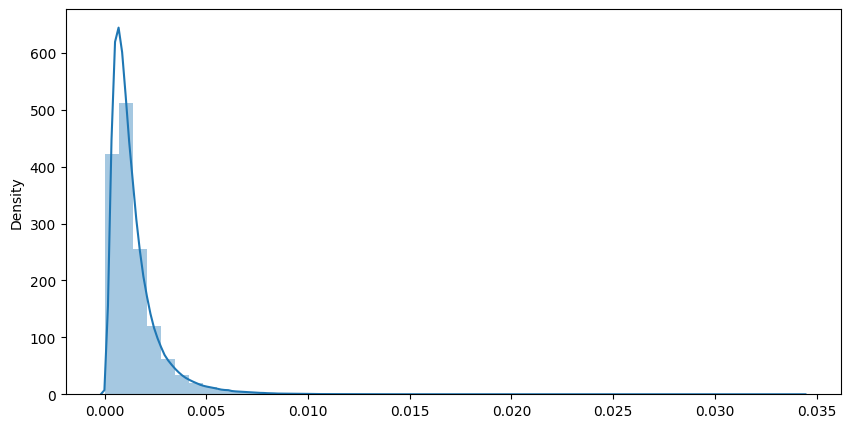

In [57]:
plt.rcParams['figure.figsize'] = [10, 5]
sns.distplot(train_error)

Genero un límite para identificar un valor "extraño"

0.007040791679173708


<ipython-input-58-ff4028cc34ee>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_error)


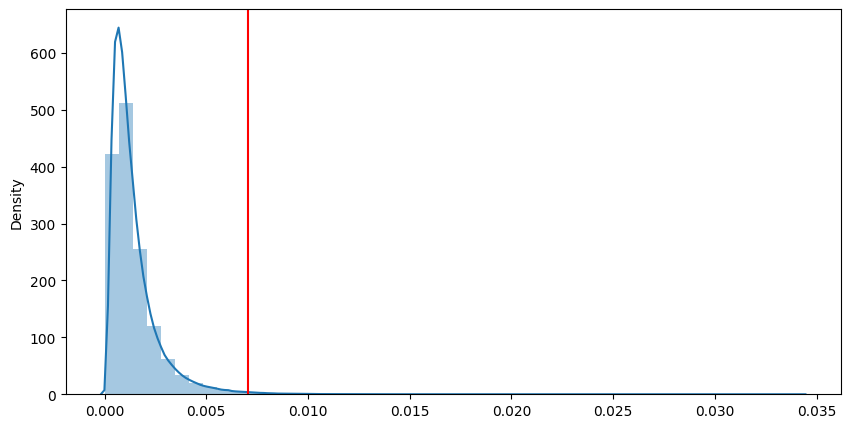

In [58]:
q = np.quantile(train_error, (0.994))
print(q)

sns.distplot(train_error)
plt.axvline(q, 0, 1, color = 'red')
plt.show()

## Validación de entrenamiento

Transformación de los datos:

In [62]:
x_test = ct.fit_transform(x_test)
print(f"Total= {len(x_test)}")
x_test

Total= 326340


array([[-8.34927218e-02,  7.06985023e-01,  3.01901033e-01, ...,
        -8.98529318e-01, -8.81192654e-01,  0.00000000e+00],
       [-4.34296593e-01,  7.18014468e-01,  1.12263431e-01, ...,
         3.06492944e-01, -8.48840761e-01,  1.00000000e+00],
       [-4.42269408e-01,  8.09926509e-01, -8.37942002e-01, ...,
        -3.25649882e-01, -1.35722766e+00,  2.00000000e+00],
       ...,
       [-4.19945526e-01, -2.53015707e+00, -1.24142626e+00, ...,
        -1.08350786e-01, -4.74483136e-01,  1.02000000e+02],
       [-1.80761068e-01, -2.69559875e+00, -1.02152734e+00, ...,
         2.96346826e+00,  1.64687674e+00,  1.03000000e+02],
       [-4.42269408e-01, -2.55221596e+00, -1.27572242e+00, ...,
        -1.36275921e+00,  1.24016722e+00,  1.04000000e+02]])

Predicción con los datos de prueba:

In [63]:
x_test_pred = autoencoder.predict(x_test)
pd.DataFrame(x_test_pred)

10199/10199 [==============================] - 12s 1ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.134008,0.676068,0.350540,0.182137,0.549040,0.550655,-0.101936,0.309424,-1.100414,0.166268,-1.260145,-1.422276,-0.899759,-1.303358,-1.206246,-1.357173,-0.878280,-0.933064,0.062315
1,-0.491312,0.690004,0.169932,0.185504,0.454371,0.385199,0.088252,0.113352,-0.016849,0.041522,-0.546523,-0.683501,-0.168231,-0.761133,-0.123234,-0.435062,0.320174,-0.915604,1.085078
2,-0.509304,0.788573,-0.779416,-0.671908,-0.591144,-0.672396,-0.815025,-0.645251,-0.610023,-0.748751,-0.911348,-1.058713,-0.429192,-1.114097,-0.947792,-1.300133,-0.291417,-1.436385,2.046620
3,-0.463881,0.803166,-0.641187,-0.647533,-0.387504,-0.414062,-0.505779,-0.863836,0.870059,-0.611538,0.121208,-0.246118,0.457280,-0.620565,0.551793,0.277940,0.945220,-0.574358,3.036323
4,0.431518,0.668165,-0.873165,-1.001154,-0.789067,-0.812201,-0.952985,-1.183430,0.483340,-0.939260,-0.193974,-0.278320,-0.173426,-0.217352,0.095632,-0.307769,0.280211,-0.688130,4.021955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326335,-0.278324,-2.433626,-1.108871,-1.407505,-1.320285,-1.366900,-1.584568,-1.341703,-0.911985,-1.361090,1.139663,1.288301,0.739707,1.307922,1.113639,0.913767,1.067706,0.162634,100.147675
326336,-0.467431,-2.420239,-1.245852,-1.032653,-1.352665,-1.522466,-0.926600,-1.051470,0.168191,-1.155074,-0.160104,-0.475548,0.392540,-0.842723,-0.252869,-0.525954,0.450937,-1.106585,101.199661
326337,-0.423380,-2.553411,-1.268808,-1.603974,-1.558660,-1.672840,-1.592203,-1.547401,-0.464262,-1.687063,-0.296445,-0.488532,-0.139615,-0.478709,-0.414773,-0.473966,-0.066948,-0.527611,102.121338
326338,-0.207643,-2.754470,-0.952141,-1.056059,-1.137691,-1.224481,-1.089536,-1.443036,0.837998,-1.124140,3.077533,3.436472,3.670502,2.098752,2.982022,3.482211,3.064079,1.573305,103.119133


Cuantificación de los errores en test:

In [64]:
test_error = tf.keras.losses.mean_squared_error(x_test, x_test_pred).numpy()
test_error

array([0.00101963, 0.00349753, 0.00293794, ..., 0.00509084, 0.00810725,
       0.0085451 ], dtype=float32)

El punto de corte sigue siendo el mismo del proceso de entrenamiento, vemos gráficamente lo ocurrido:

<ipython-input-65-d5f6a1fb93bd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_error)


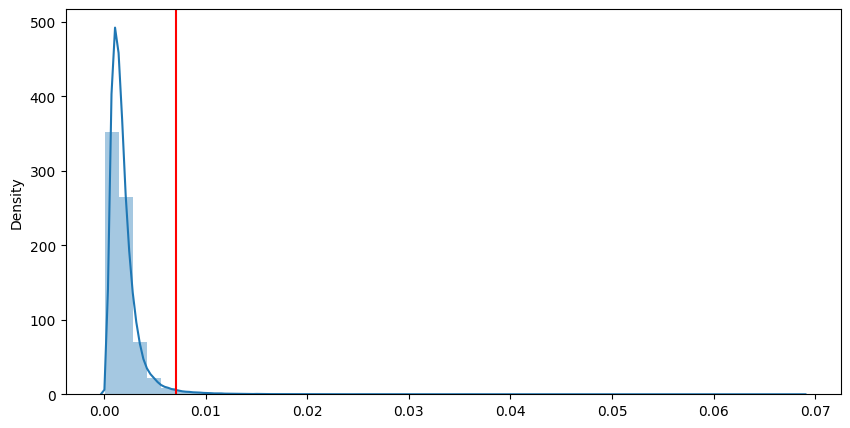

In [65]:
sns.distplot(test_error)
plt.axvline(q, 0, 1, color = 'red')
plt.show()

In [66]:
y_test_pred = (test_error > q).astype(int)
y_test_pred

array([0, 0, 0, ..., 0, 1, 1])

Es importante recordar que el cero es la clase positiva:

In [71]:
y_test_ = (y_test != 0).astype(int)
y_test_

0          0
7          0
14         0
21         0
28         0
          ..
2271917    1
2271924    1
2271931    1
2271938    1
2271945    1
Name: score, Length: 326340, dtype: int64

In [72]:
print("----- Classification Report for outliers -----")
print(classification_report(y_test_, y_test_pred))

----- Classification Report for outliers -----
              precision    recall  f1-score   support

           0       0.69      0.99      0.81    222634
           1       0.60      0.03      0.06    103706

    accuracy                           0.69    326340
   macro avg       0.64      0.51      0.44    326340
weighted avg       0.66      0.69      0.57    326340



# Modelo en producción

Transformación de los datos:

In [73]:
x_val = ct.fit_transform(x_val)
print(f"Total= {len(x_val)}")
x_val

Total= 323232


array([[ 2.41307076e+00,  5.53954917e-01,  2.85015242e-01, ...,
        -2.65814874e-01,  3.66257022e-02,  0.00000000e+00],
       [-4.41414866e-01,  8.19361382e-01, -5.49843138e-01, ...,
         7.43366179e-01, -8.18483373e-01,  1.00000000e+00],
       [-4.23194745e-01,  7.21677058e-01,  6.23416576e-01, ...,
        -1.62067289e-01, -6.85159915e-01,  2.00000000e+00],
       ...,
       [-4.35341492e-01, -2.53323834e+00, -1.25906749e+00, ...,
         1.49175465e-01,  1.69949160e-01,  1.01000000e+02],
       [-4.35341492e-01, -2.56457105e+00, -1.06251103e+00, ...,
         1.72754462e-01, -2.71397459e-01,  1.02000000e+02],
       [-1.95443232e-01, -2.57562965e+00, -1.12127533e+00, ...,
        -1.29857492e+00,  4.87167043e-01,  1.03000000e+02]])

Predicción con los datos de validación:

In [74]:
x_val_pred = autoencoder.predict(x_val)
pd.DataFrame(x_val_pred)

10101/10101 [==============================] - 13s 1ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2.350733,0.517134,0.352659,0.132914,0.533200,0.502408,-0.078852,0.088367,-0.396642,0.092331,-0.609458,-0.541699,-0.250789,-0.549921,-0.257136,-0.169017,-0.218821,-0.020193,0.087908
1,-0.476225,0.791254,-0.509444,-0.680858,-0.343983,-0.340573,-0.588465,-0.985288,1.035050,-0.686020,-0.133316,-0.369621,0.413561,-0.766976,0.312146,-0.084840,0.749165,-0.869218,1.049623
2,-0.485237,0.691879,0.702126,0.499184,0.762176,0.747890,0.291227,0.435953,-0.222167,0.355464,-0.577662,-0.578815,-0.190260,-0.630985,-0.198606,-0.619636,-0.104490,-0.734549,2.046627
3,-0.473029,0.521944,-0.539395,-0.303842,-0.210478,-0.260803,-0.252341,-0.392281,0.315370,-0.383473,-0.874730,-1.057545,-0.650426,-0.969724,-0.799626,-0.444601,-0.755632,0.151776,3.061471
4,-0.475083,0.641124,-0.174754,-0.053138,0.126943,0.096689,0.073924,-0.325179,1.138925,-0.188293,-0.588708,-0.811237,-0.119500,-0.999173,-0.180583,-0.114956,-0.091364,-0.079847,4.067130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323227,-0.424091,-2.616456,-1.110625,-1.266821,-1.289734,-1.401793,-1.217286,-1.320053,0.005049,-1.307449,0.218990,0.107089,0.750273,-0.310169,0.367677,0.558300,0.759397,0.013569,99.066605
323228,-0.455401,-2.467246,-1.406452,-1.874000,-1.997685,-2.151594,-1.818921,-1.928157,-0.083008,-1.902799,-0.056850,0.017959,0.218212,-0.015039,-0.194957,-0.483417,0.408378,-0.986688,100.038109
323229,-0.440895,-2.544990,-1.288921,-1.505295,-1.618690,-1.725900,-1.459861,-1.425131,-0.423007,-1.517205,0.099177,-0.036303,0.129408,-0.054407,0.157073,0.208025,0.194657,0.126065,101.034828
323230,-0.447958,-2.572650,-1.075490,-1.203912,-1.224033,-1.275215,-1.157857,-1.159603,-0.235456,-1.272400,0.106611,-0.179810,0.103543,-0.257433,0.177133,-0.099943,0.191010,-0.310104,101.996651


Cuantificación de los errores en producción:

In [75]:
val_error = tf.keras.losses.mean_squared_error(x_val, x_val_pred).numpy()
val_error

array([0.002215  , 0.00081334, 0.00355128, ..., 0.00198949, 0.0008465 ,
       0.00065253], dtype=float32)

El punto de corte sigue siendo el mismo del proceso de entrenamiento, vemos gráficamente lo ocurrido:

<ipython-input-76-be17643e7a19>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(val_error)


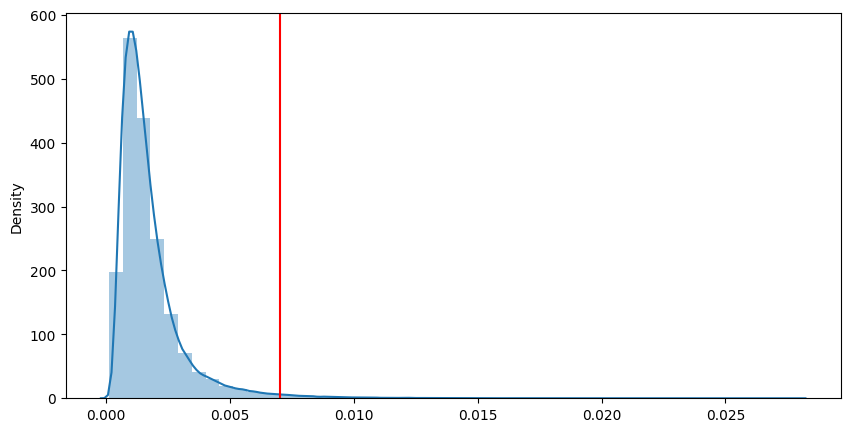

In [76]:
sns.distplot(val_error)
plt.axvline(q, 0, 1, color = 'red')
plt.show()

In [77]:
y_val_pred = (val_error > q).astype(int)
y_val_pred

array([0, 0, 0, ..., 0, 0, 0])

Es importante recordar que el cero es la clase positiva:

In [82]:
y_val_ = (y_val != 0).astype(int)
y_val_

2          1
9          1
16         1
23         1
30         1
          ..
2268805    1
2268812    1
2268819    1
2268826    1
2268833    1
Name: score, Length: 323232, dtype: int64

In [83]:
print("----- Classification Report for outliers -----")
print(classification_report(y_val_, y_val_pred))

----- Classification Report for outliers -----
              precision    recall  f1-score   support

           0       0.60      0.99      0.75    191773
           1       0.70      0.02      0.04    131459

    accuracy                           0.60    323232
   macro avg       0.65      0.51      0.39    323232
weighted avg       0.64      0.60      0.46    323232



# Modelo alterno

Reconstrucción del entrenamiento:

In [84]:
drop_fields = ["fips", "date"]

In [85]:
train = data.drop(drop_fields, axis=1)
train.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.50,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,10.18,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,7.41,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,13.48,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [86]:
print(f"La información cuenta con {train.shape[0]:,} registro(s)")

La información cuenta con 19,300,680 registro(s)


In [87]:
train = train[train["score"] == 0]
train.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
430,0.01,100.57,3.52,4.85,-1.10,-1.05,11.05,-0.12,11.16,4.94,3.16,4.54,2.18,2.36,5.99,7.24,4.59,2.64,0.0
437,1.30,99.84,8.16,14.63,10.54,10.55,19.03,9.47,9.56,14.53,2.78,3.81,1.98,1.83,5.82,7.04,5.12,1.92,0.0
444,30.95,99.53,4.35,2.51,1.77,1.77,4.21,0.97,3.24,2.57,2.92,3.49,2.22,1.27,5.16,6.10,4.15,1.94,0.0
451,0.01,100.92,3.66,6.05,-0.54,-0.49,13.49,-0.96,14.45,6.16,1.95,2.86,1.36,1.50,3.95,6.02,2.26,3.76,0.0
458,55.62,100.14,12.30,18.04,16.89,16.89,23.23,12.01,11.23,18.03,2.96,4.85,1.62,3.23,5.72,8.10,3.74,4.37,0.0


In [88]:
print(f"La información cuenta con ahora con {train.shape[0]:,} registro(s)")

La información cuenta con ahora con 1,480,827 registro(s)


Separando los datos de entrenamiento en X e Y:

In [89]:
x_train, y_train = train.drop(["score"], axis=1), train['score']
y_train

430         0.0
437         0.0
444         0.0
451         0.0
458         0.0
           ... 
19300647    0.0
19300654    0.0
19300661    0.0
19300668    0.0
19300675    0.0
Name: score, Length: 1480827, dtype: float64

## Ensamblando el nuevo autoencoder

In [90]:
autoencoder_ = Sequential(name="Autoencoder")

#Capa de Entrada
autoencoder_.add(Input(shape=(x_train.shape[1],)))

#Encoder
autoencoder_.add(Dense(1000))
autoencoder_.add(Dense(500))

#Decoder
autoencoder_.add(Dense(1000))
autoencoder_.add(Dense(x_train.shape[1]))

In [91]:
autoencoder_.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder_.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              19000     
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dense_6 (Dense)             (None, 1000)              501000    
                                                                 
 dense_7 (Dense)             (None, 18)                18018     
                                                                 
Total params: 1,038,518
Trainable params: 1,038,518
Non-trainable params: 0
_________________________________________________________________


In [92]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

## Entrenamiento

In [93]:
with tf.device('/device:GPU:0'):
    autoencoder_.fit(x_train,
                x_train,
                epochs=50,
                callbacks=[callback]
                )

Epoch 1/50
46276/46276 [==============================] - 125s 3ms/step - loss: 1.7588
Epoch 2/50
46276/46276 [==============================] - 124s 3ms/step - loss: 1.2068
Epoch 3/50
46276/46276 [==============================] - 122s 3ms/step - loss: 2.1937
Epoch 4/50
46276/46276 [==============================] - 123s 3ms/step - loss: 4.0700
Epoch 5/50
46276/46276 [==============================] - 123s 3ms/step - loss: 1.7631
Epoch 6/50
46276/46276 [==============================] - 123s 3ms/step - loss: 2.1367
Epoch 7/50
46276/46276 [==============================] - 125s 3ms/step - loss: 1.6108


Las predicciones:

In [94]:
x_train_pred = autoencoder_.predict(x_train)
pd.DataFrame(x_train_pred)

46276/46276 [==============================] - 58s 1ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.026775,100.590378,3.553832,4.900951,-1.077054,-1.012024,11.080678,-0.095819,11.187117,4.960819,3.165308,4.548689,2.180021,2.387820,5.999650,7.248907,4.567388,2.664200
1,1.338937,99.872208,8.182735,14.668576,10.560954,10.560505,19.051670,9.495892,9.561427,14.551092,2.780452,3.815597,1.977665,1.852244,5.827447,7.053796,5.098803,1.931286
2,31.007195,99.469055,4.360954,2.524199,1.750827,1.758571,4.238470,0.949929,3.249169,2.567192,2.931513,3.512930,2.207483,1.300000,5.184311,6.098004,4.118167,1.978063
3,0.041038,100.927437,3.699568,6.113839,-0.504354,-0.442771,13.526757,-0.912494,14.453706,6.195960,1.951345,2.863680,1.359489,1.523215,3.958577,6.021767,2.237801,3.767803
4,55.656250,99.925705,12.254825,17.988659,16.822060,16.754742,23.204147,11.970641,11.135177,17.995993,2.980107,4.872095,1.605241,3.245139,5.746756,8.075192,3.742233,4.350375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480822,-0.042411,82.424301,2.171200,-4.338080,-9.423818,-9.310720,-1.592168,-7.345168,5.759626,-4.486817,6.936470,10.263607,3.081022,7.215870,9.414343,12.591411,5.585191,7.008809
1480823,0.176270,82.732552,1.013640,-11.850312,-18.447945,-17.834749,-6.757893,-15.178549,8.416289,-11.903222,2.271274,3.944588,0.932985,3.021848,3.031526,5.220307,0.778524,4.341985
1480824,0.044594,82.950676,1.476391,-9.487659,-14.077131,-13.857927,-2.648607,-12.984321,10.351933,-10.916661,3.641800,6.578777,1.269888,5.326539,5.311044,8.360258,2.075334,6.253863
1480825,0.294550,83.133995,2.760528,-2.530213,-6.874614,-6.815906,2.654037,-7.798359,10.459803,-3.957926,6.169350,8.429713,3.435131,5.017670,8.981069,10.152947,6.626908,3.509626


Verificamos la distribución de la clase normal:

In [95]:
train_error = tf.keras.losses.mean_squared_error(x_train, x_train_pred).numpy()
train_error

array([0.00062487, 0.00044718, 0.00077125, ..., 0.00269799, 0.00059382,
       0.00241041], dtype=float32)

<ipython-input-96-5a8ce24be51a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_error)


<Axes: ylabel='Density'>

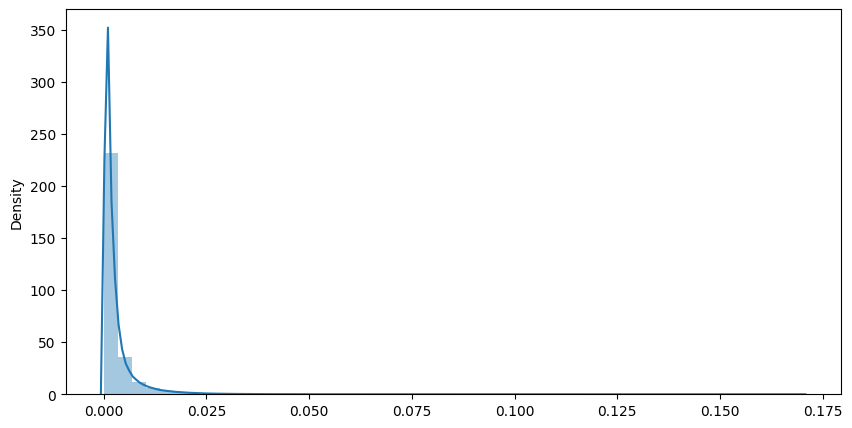

In [96]:
plt.rcParams['figure.figsize'] = [10, 5]
sns.distplot(train_error)

Definiendo el límite para datos anómalos:

0.02668144836276766


<ipython-input-97-ff4028cc34ee>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_error)


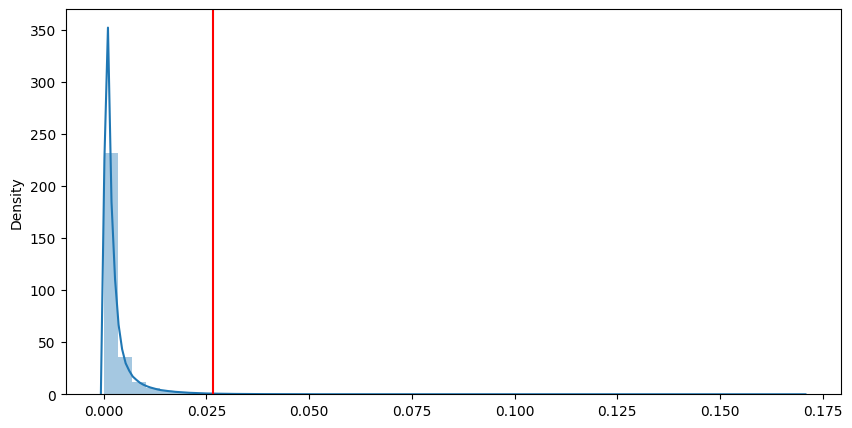

In [97]:
q = np.quantile(train_error, (0.994))
print(q)

sns.distplot(train_error)
plt.axvline(q, 0, 1, color = 'red')
plt.show()

## Prueba

Obteniendo nuevamente los datos de prueba:

In [98]:
url = f'{dir_path}/test_timeseries/test_timeseries.csv'
test = pd.read_csv(url)

In [99]:
test = test.drop(drop_fields, axis=1)
test.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,6.46,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0
1,4.94,100.48,8.65,13.05,11.83,11.74,17.76,9.54,8.23,13.06,1.02,1.35,0.32,1.03,2.13,3.37,0.56,2.81,NaN
2,20.74,100.03,8.59,12.12,11.67,11.67,13.74,10.44,3.30,12.12,1.83,4.23,0.34,3.88,3.41,7.49,0.72,6.77,NaN
3,16.17,99.47,7.93,11.80,10.38,9.59,18.19,5.44,12.75,11.72,3.75,5.25,2.34,2.91,6.78,9.61,4.90,4.71,NaN
4,0.01,100.39,5.32,7.91,4.73,4.71,14.37,3.68,10.69,7.75,2.32,2.90,1.69,1.21,4.42,5.87,3.15,2.72,NaN


In [100]:
print(f"La información cuenta con {test.shape[0]:,} registro(s)")

La información cuenta con 2,271,948 registro(s)


In [101]:
test = test[test["score"].isnull() == False]
test.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,6.46,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0
7,0.05,100.57,8.75,13.15,12.01,11.98,20.04,9.36,10.68,13.05,2.33,3.40,1.68,1.72,5.13,6.51,3.67,2.85,0.0
14,0.00,101.07,4.04,3.91,0.94,0.96,9.40,1.02,8.38,3.91,1.73,2.40,1.36,1.04,3.28,4.13,2.39,1.75,0.0
21,0.03,101.14,4.96,6.03,3.81,3.08,12.43,-1.63,14.06,6.08,3.68,4.57,2.49,2.07,6.65,8.56,5.01,3.55,0.0
28,5.79,100.36,3.69,2.23,-0.41,-1.03,7.33,-5.19,12.52,2.18,3.10,4.52,1.71,2.81,5.62,6.96,3.60,3.35,0.0


In [102]:
print(f"La información cuenta con ahora con {test.shape[0]:,} registro(s)")

La información cuenta con ahora con 326,340 registro(s)


In [103]:
x_test, y_test = test.drop(["score"], axis=1), test['score']
y_test

0          0.0000
7          0.0000
14         0.0000
21         0.0000
28         0.0000
            ...  
2271917    3.5109
2271924    3.5109
2271931    3.5182
2271938    3.5182
2271945    3.5182
Name: score, Length: 326340, dtype: float64

Transformando los datos:

In [104]:
x_test = ct.fit_transform(x_test)
print(f"Total= {len(x_test)}")
x_test

Total= 326340


array([[-0.08349272,  0.70698502,  0.30190103, ..., -1.35592223,
        -0.89852932, -0.88119265],
       [-0.43429659,  0.71801447,  0.11226343, ..., -0.44616014,
         0.30649294, -0.84884076],
       [-0.44226941,  0.80992651, -0.837942  , ..., -1.31225365,
        -0.32564988, -1.35722766],
       ...,
       [-0.41994553, -2.53015707, -1.24142626, ..., -0.44979919,
        -0.10835079, -0.47448314],
       [-0.18076107, -2.69559875, -1.02152734, ...,  3.48401208,
         2.96346826,  1.64687674],
       [-0.44226941, -2.55221596, -1.27572242, ..., -0.02766958,
        -1.36275921,  1.24016722]])

Generando las nuevas predicciones:

In [105]:
x_test_pred = autoencoder_.predict(x_test)
pd.DataFrame(x_test_pred)

10199/10199 [==============================] - 13s 1ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.022789,1.604730,0.464628,0.300113,0.615891,0.572151,-0.202072,0.617597,-0.877196,0.309097,-1.295385,-1.766771,-0.613826,-1.139896,-1.258412,-1.488433,-0.809358,-0.802526
1,-0.363463,1.479572,0.257432,0.175253,0.549919,0.454648,0.277760,0.259595,0.019127,0.180807,-0.648164,-0.796430,-0.056005,-0.727287,-0.151399,-0.399124,0.297393,-0.794769
2,-0.381338,1.626965,-0.688119,-0.681344,-0.558299,-0.637571,-0.806590,-0.386895,-0.449690,-0.655204,-0.989187,-1.295529,-0.242072,-1.038630,-1.000449,-1.400860,-0.250878,-1.262148
3,-0.366636,1.462623,-0.530420,-0.473353,-0.200896,-0.391648,-0.215818,-0.928347,0.760016,-0.448864,0.120778,-0.165600,0.476051,-0.625921,0.560674,0.467858,0.888238,-0.485294
4,0.545601,1.382121,-0.775263,-0.823283,-0.631517,-0.799120,-0.752684,-1.174100,0.441375,-0.801736,-0.211759,-0.286142,-0.073689,-0.195864,0.082939,-0.213722,0.250509,-0.543518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326335,-0.191544,-1.937307,-1.115502,-1.360582,-1.380509,-1.399307,-1.781693,-1.070020,-0.703172,-1.348571,1.141778,1.621805,0.600135,1.005264,1.076829,1.185775,0.962299,0.103268
326336,-0.379489,-1.709536,-1.109424,-0.910235,-1.504376,-1.258440,-0.752732,-0.927989,0.159816,-1.133849,-0.233072,-0.545892,0.401487,-0.935274,-0.361386,-0.421386,0.404132,-0.990962
326337,-0.361374,-1.790976,-1.118406,-1.525523,-1.617216,-1.568306,-1.596965,-1.299910,-0.324293,-1.623857,-0.329446,-0.591960,-0.069977,-0.514441,-0.504112,-0.412495,-0.089356,-0.456590
326338,-0.114885,-2.744852,-1.132404,-1.209428,-1.062795,-1.205371,-0.931675,-1.480876,0.703915,-1.257971,3.114260,4.430426,3.092201,1.311965,2.998010,4.141049,2.697828,1.390154


Cuantificación de los errores en test:

In [106]:
test_error = tf.keras.losses.mean_squared_error(x_test, x_test_pred).numpy()
test_error

array([0.0714574 , 0.0409698 , 0.05179652, ..., 0.03927901, 0.14798003,
       0.0415992 ], dtype=float32)

Verificando la distribución de los datos:

<ipython-input-107-d5f6a1fb93bd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_error)


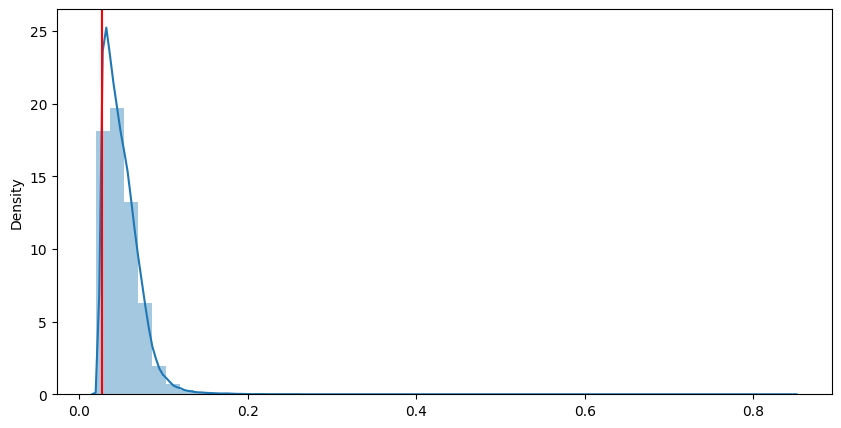

In [107]:
sns.distplot(test_error)
plt.axvline(q, 0, 1, color = 'red')
plt.show()

In [108]:
y_test_pred = (test_error > q).astype(int)
y_test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [109]:
y_test_ = (y_test != 0).astype(int)
y_test_

0          0
7          0
14         0
21         0
28         0
          ..
2271917    1
2271924    1
2271931    1
2271938    1
2271945    1
Name: score, Length: 326340, dtype: int64

Las métricas correspondientes:

In [110]:
print("----- Classification Report for outliers -----")
print(classification_report(y_test_, y_test_pred))

----- Classification Report for outliers -----
              precision    recall  f1-score   support

           0       0.72      0.04      0.08    222634
           1       0.32      0.97      0.48    103706

    accuracy                           0.33    326340
   macro avg       0.52      0.50      0.28    326340
weighted avg       0.59      0.33      0.21    326340



## Producción

In [111]:
url = f'{dir_path}/validation_timeseries/validation_timeseries.csv'
validation = pd.read_csv(url)

In [112]:
validation = validation.drop(drop_fields, axis=1)
validation.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,32.50,100.02,10.47,14.69,14.47,14.47,17.68,10.53,7.15,14.63,2.14,2.71,1.52,1.19,4.40,5.96,2.25,3.71,NaN
1,63.52,100.04,12.75,17.96,17.75,17.75,20.30,16.14,4.16,17.85,2.75,4.31,1.60,2.71,5.50,8.16,4.05,4.11,NaN
2,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,9.20,14.06,2.25,3.73,1.64,2.09,4.80,7.27,2.54,4.72,2.0
3,0.01,100.02,5.21,8.10,3.86,3.88,11.74,2.12,9.62,8.08,2.63,3.95,1.34,2.60,4.98,6.16,3.36,2.80,NaN
4,0.01,99.89,4.54,5.91,2.20,2.22,13.07,-0.18,13.24,5.85,1.76,2.76,0.47,2.28,3.43,4.70,0.66,4.04,NaN


In [113]:
print(f"La información cuenta con {validation.shape[0]:,} registro(s)")

La información cuenta con 2,268,840 registro(s)


In [114]:
validation = validation[validation["score"].isnull() == False]
validation.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
2,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,9.20,14.06,2.25,3.73,1.64,2.09,4.80,7.27,2.54,4.72,2.0
9,0.02,101.13,5.62,5.92,4.54,4.55,12.42,-2.37,14.79,5.81,3.22,4.24,2.52,1.72,6.19,7.55,4.68,2.86,2.0
16,0.14,100.60,11.41,17.21,16.06,16.06,23.03,13.15,9.88,17.10,2.24,3.61,1.71,1.90,4.93,5.90,2.76,3.15,2.0
23,0.00,99.72,5.60,9.27,5.34,5.35,16.23,4.18,12.06,8.95,1.82,2.34,1.03,1.31,3.52,6.49,1.47,5.02,1.0
30,0.00,100.37,7.31,11.38,9.21,9.21,20.29,5.05,15.24,11.32,2.31,3.00,1.76,1.24,5.00,7.40,2.88,4.52,1.0


In [115]:
print(f"La información cuenta con ahora con {validation.shape[0]:,} registro(s)")

La información cuenta con ahora con 323,232 registro(s)


In [116]:
x_val, y_val = validation.drop(["score"], axis=1), validation['score']
y_val

2          2.0000
9          2.0000
16         2.0000
23         1.0000
30         1.0000
            ...  
2268805    0.2572
2268812    0.2572
2268819    0.2572
2268826    0.2572
2268833    0.2572
Name: score, Length: 323232, dtype: float64

Transformando los datos:

In [117]:
x_val = ct.fit_transform(x_val)
print(f"Total= {len(x_val)}")
x_val

Total= 323232


array([[ 2.41307076,  0.55395492,  0.28501524, ..., -0.16297456,
        -0.26581487,  0.0366257 ],
       [-0.44141487,  0.81936138, -0.54984314, ..., -0.06670088,
         0.74336618, -0.81848337],
       [-0.42319474,  0.72167706,  0.62341658, ..., -0.63402792,
        -0.16206729, -0.68515991],
       ...,
       [-0.43534149, -2.53323834, -1.25906749, ...,  0.23931189,
         0.14917547,  0.16994916],
       [-0.43534149, -2.56457105, -1.06251103, ..., -0.07701591,
         0.17275446, -0.27139746],
       [-0.19544323, -2.57562965, -1.12127533, ..., -0.57901439,
        -1.29857492,  0.48716704]])

Generando las nuevas predicciones:

In [120]:
x_val_pred = autoencoder_.predict(x_val)
pd.DataFrame(x_val_pred)

10101/10101 [==============================] - 13s 1ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2.475974,1.288690,0.407701,0.198434,0.619515,0.525624,-0.020183,0.278027,-0.312842,0.196652,-0.664698,-0.645953,-0.099985,-0.538751,-0.293808,-0.120438,-0.271844,0.053434
1,-0.370917,1.479487,-0.410708,-0.520907,-0.118388,-0.245371,-0.227661,-1.068261,0.883350,-0.514419,-0.148918,-0.330757,0.468268,-0.777814,0.309799,0.050888,0.698949,-0.727709
2,-0.355644,1.479875,0.764862,0.491424,0.901377,0.819635,0.437722,0.610201,-0.175754,0.483968,-0.674877,-0.701439,-0.049628,-0.637900,-0.241293,-0.639236,-0.134738,-0.607905
3,-0.381813,1.387688,-0.383794,-0.208261,-0.096810,-0.184683,-0.015009,-0.328636,0.304442,-0.216397,-0.914574,-1.311424,-0.464289,-0.823483,-0.846301,-0.420754,-0.776337,0.262552
4,-0.373603,1.434521,-0.036581,0.007070,0.338215,0.228940,0.534410,-0.401464,0.965031,0.013840,-0.650053,-0.944351,-0.001693,-0.915431,-0.205715,-0.025832,-0.155284,0.050201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323227,-0.351667,-1.999350,-1.027987,-1.195616,-1.248175,-1.397846,-1.142331,-1.173196,0.060497,-1.278793,0.184145,0.238838,0.710409,-0.468421,0.326160,0.760705,0.650033,0.031897
323228,-0.384469,-1.801342,-1.283002,-1.823569,-2.021119,-2.067592,-1.754996,-1.736861,-0.011270,-1.899118,-0.113894,0.052537,0.223489,-0.161046,-0.282884,-0.396202,0.346636,-0.852316
323229,-0.379279,-1.863340,-1.167995,-1.416115,-1.640674,-1.736482,-1.491030,-1.201535,-0.290294,-1.467616,0.065461,-0.008113,0.145160,-0.150423,0.090354,0.351946,0.116895,0.137006
323230,-0.376433,-1.871991,-0.955654,-1.056355,-1.161901,-1.276262,-1.137120,-0.998665,-0.134766,-1.204171,0.086747,-0.186739,0.137158,-0.315905,0.132160,-0.001021,0.159968,-0.256983


Cuantificación de los errores en test:

In [121]:
val_error = tf.keras.losses.mean_squared_error(x_val, x_val_pred).numpy()
val_error

array([0.03693743, 0.04023609, 0.03985833, ..., 0.03145611, 0.03185221,
       0.04909525], dtype=float32)

Verificando la distribución de los datos:

<ipython-input-122-be17643e7a19>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(val_error)


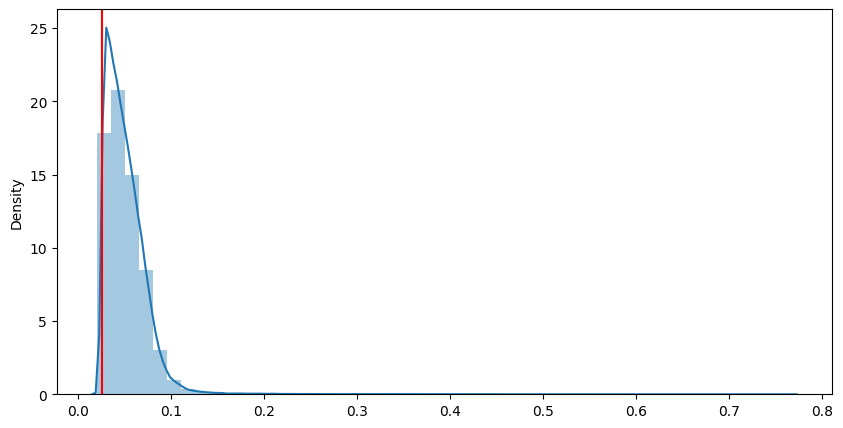

In [122]:
sns.distplot(val_error)
plt.axvline(q, 0, 1, color = 'red')
plt.show()

In [123]:
y_val_pred = (val_error > q).astype(int)
y_val_pred

array([1, 1, 1, ..., 1, 1, 1])

In [124]:
y_val_ = (y_val != 0).astype(int)
y_val_

2          1
9          1
16         1
23         1
30         1
          ..
2268805    1
2268812    1
2268819    1
2268826    1
2268833    1
Name: score, Length: 323232, dtype: int64

Las métricas correspondientes:

In [125]:
print("----- Classification Report for outliers -----")
print(classification_report(y_val_, y_val_pred))

----- Classification Report for outliers -----
              precision    recall  f1-score   support

           0       0.55      0.03      0.06    191773
           1       0.41      0.96      0.57    131459

    accuracy                           0.41    323232
   macro avg       0.48      0.50      0.31    323232
weighted avg       0.49      0.41      0.27    323232



# Conclusiones

*   El entrenamiento de la red es bueno.
*   A pesar de descartar muchos datos por no conocer el puntaje y poder determinar si es o no anomalía (no tengo el conocimiento y el criterio para calcularlo a partir de los otros datos), el red fue entrenada con un 22% en número con respecto a los datos de entrenamiento, sin embargo, era un set de datos separado y permite evaluar mejorar la realidad .
*   No fue necesario mover el umbral de los resultados obtenidos, la vista de los cuantiles permitió observar una clara diferenciación de los datos.
*   Los valores de alto recall en la clase positiva indican que el modelo aprendió muy bien a identificar los valores normales. Este comportamiento fue evidenciado con los datos de prueba y confirmados con los datos de validación en producción.
*   Sin embargo deben considerarse algunas de las decisiones tomadas en el proceso: 

1.   Descartar las ausencias en el entrenamiento (sin embargo esto hubiera descartado 16'543.884 registros, superando ampliamente los datos de la clase positiva, por consiguiente no considero sea esta la causa)
2.   Incluir la variable de la fecha puede tener alta incidencia en el proceso, por esta razón los resultados en el modelo alterno tienen un mejor recall en la clase positiva.

*   El modelo alterno estaría en mejor capacidad de detectar anomalías, sin embargo, personalmente me llama la atención que las fechas no tienen relevancia para este modelo conforme los resultados obtenidos, o podr